In [1]:
# 挑關連度高的前10個features
# 對SalePrice取log()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Input File

In [4]:
Data_train=pd.read_csv('./data/train.csv')

Data_test=pd.read_csv('./data/test.csv')

Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
Data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Baseline Model (Choose two parameters to bild the linear regression)

In [7]:
t=Data_train.corrwith(Data_train['SalePrice'])

In [8]:
t.sort_values()[-10:]

YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
dtype: float64

In [9]:
Data_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

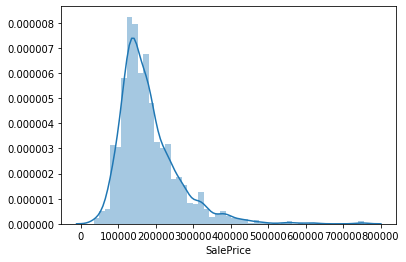

In [10]:
sns.distplot(Data_train['SalePrice'])

In [155]:
Data_train["SalePrice"].apply(np.log2)

0       17.669688
1       17.469610
2       17.769915
3       17.095067
4       17.931569
          ...    
1455    17.416995
1456    17.680030
1457    18.023776
1458    17.116801
1459    17.170355
Name: SalePrice, Length: 1460, dtype: float64

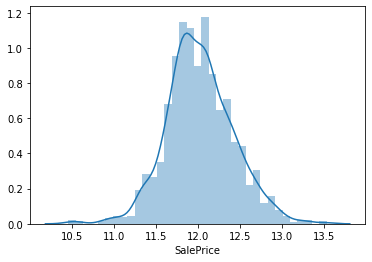

In [156]:
sns.distplot(Data_train["SalePrice"].apply(np.log))

In [157]:
Data_train["SalePrice"]=Data_train["SalePrice"].apply(np.log)

In [158]:
np.exp(Data_train["SalePrice"])

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

# 特徵工程

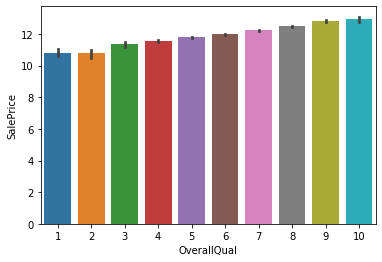

In [159]:
#OverallQual
ax = sns.barplot(x="OverallQual", y="SalePrice", data=Data_train)

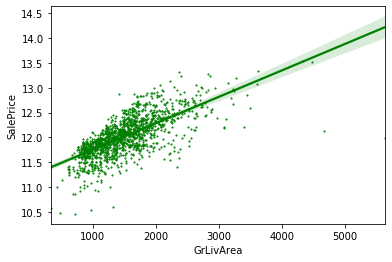

In [160]:
#GrLivArea
sns.regplot(x="GrLivArea", y="SalePrice", data=Data_train, marker='*', color='green', scatter_kws={'s':2})

In [161]:
x=Data_train[['Id','GrLivArea']]
y=(Data_train['GrLivArea']-Data_train['GrLivArea'].mean())/Data_train['GrLivArea'].std()
Data_train=Data_train[y<3]

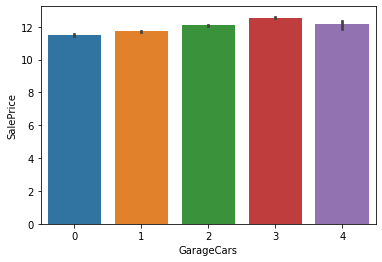

In [162]:
#GarageCars
ax = sns.barplot(x="GarageCars", y="SalePrice", data=Data_train)

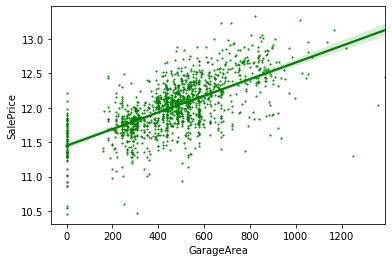

In [163]:
#GarageArea
sns.regplot(x="GarageArea", y="SalePrice", data=Data_train, marker='*', color='green', scatter_kws={'s':2})

In [164]:
x=Data_train[['Id','GarageArea']]
y=(Data_train['GarageArea']-Data_train['GarageArea'].mean())/Data_train['GarageArea'].std()
Data_train=Data_train[y<3]

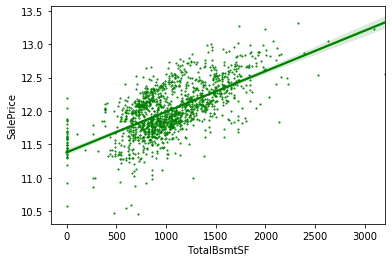

In [165]:
#TotalBsmtSF
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=Data_train, marker='*', color='green', scatter_kws={'s':2})

In [166]:
x=Data_train[['Id','TotalBsmtSF']]
y=(Data_train['TotalBsmtSF']-Data_train['TotalBsmtSF'].mean())/Data_train['TotalBsmtSF'].std()
Data_train=Data_train[y<3]

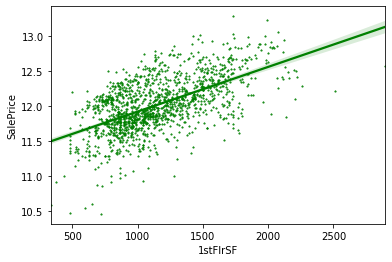

In [167]:
#1stFlrSF
sns.regplot(x="1stFlrSF", y="SalePrice", data=Data_train, marker='*', color='green', scatter_kws={'s':2})

In [168]:
x=Data_train[['Id','1stFlrSF']]
y=(Data_train['1stFlrSF']-Data_train['1stFlrSF'].mean())/Data_train['1stFlrSF'].std()
Data_train=Data_train[y<3]

In [169]:
Data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864462


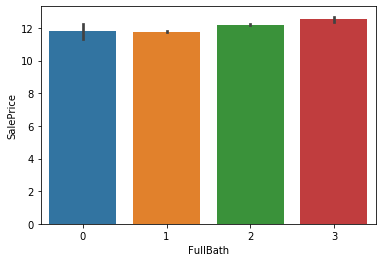

In [170]:
#FullBath 
ax = sns.barplot(x="FullBath", y="SalePrice", data=Data_train)

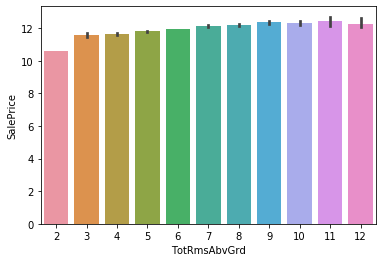

In [171]:
#TotRmsAbvGrd 
ax = sns.barplot(x="TotRmsAbvGrd", y="SalePrice", data=Data_train)

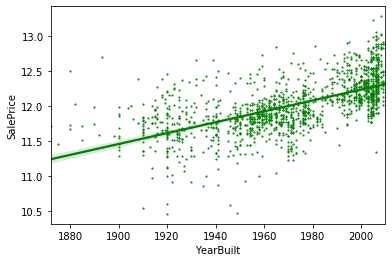

In [172]:
#YearBuilt 
sns.regplot(x="YearBuilt", y="SalePrice", data=Data_train, marker='*', color='green', scatter_kws={'s':2})

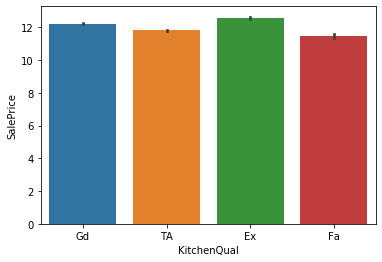

In [173]:
#KitchenQual 
ax = sns.barplot(x="KitchenQual", y="SalePrice", data=Data_train)

In [174]:
AllData=pd.concat([Data_train,Data_test])
AllData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


## log transform skewed continuous numerical features

In [175]:
'''
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice      
'''

'\nYearBuilt       0.522897\nTotRmsAbvGrd    0.533723\nFullBath        0.560664\n1stFlrSF        0.605852\nTotalBsmtSF     0.613581\nGarageArea      0.623431\nGarageCars      0.640409\nGrLivArea       0.708624\nOverallQual     0.790982\nSalePrice      \n'

In [118]:
Data_train_label=Data_train['SalePrice']
AllData=AllData[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','KitchenQual']]

In [119]:
AllData
#GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual
0,7,1710,2.0,548.0,856.0,856,2,8,2003,Gd
1,6,1262,2.0,460.0,1262.0,1262,2,6,1976,TA
2,7,1786,2.0,608.0,920.0,920,2,6,2001,Gd
3,7,1717,3.0,642.0,756.0,961,1,7,1915,Gd
4,8,2198,3.0,836.0,1145.0,1145,2,9,2000,Gd
...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,TA
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,TA
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,TA
1457,5,970,0.0,0.0,912.0,970,1,6,1992,TA


In [120]:
contiData=['GrLivArea','1stFlrSF']
AllData[contiData].skew()
np.log1p(AllData[contiData]).skew()

GrLivArea   -0.092675
1stFlrSF    -0.016703
dtype: float64

In [121]:
AllData[contiData]=np.log1p(AllData[contiData])

In [122]:
def KitchenQual_encode(x):
    KitchenQual_encode_dict={'Gd':1, 'TA':2, 'Ex':2, 'Fa':4}
    if x in KitchenQual_encode_dict:
        return KitchenQual_encode_dict[x]
    else:
        return 0

In [123]:
AllData['KitchenQual']=AllData['KitchenQual'].apply(KitchenQual_encode)

In [124]:
AllData

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual
0,7,7.444833,2.0,548.0,856.0,6.753438,2,8,2003,1
1,6,7.141245,2.0,460.0,1262.0,7.141245,2,6,1976,2
2,7,7.488294,2.0,608.0,920.0,6.825460,2,6,2001,1
3,7,7.448916,3.0,642.0,756.0,6.869014,1,7,1915,1
4,8,7.695758,3.0,836.0,1145.0,7.044033,2,9,2000,1
...,...,...,...,...,...,...,...,...,...,...
1454,4,6.996681,0.0,0.0,546.0,6.304449,1,5,1970,2
1455,4,6.996681,1.0,286.0,546.0,6.304449,1,6,1970,2
1456,5,7.110696,2.0,576.0,1224.0,7.110696,1,7,1960,2
1457,5,6.878326,0.0,0.0,912.0,6.878326,1,6,1992,2


In [125]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2885 non-null   int64  
 1   GrLivArea     2885 non-null   float64
 2   GarageCars    2884 non-null   float64
 3   GarageArea    2884 non-null   float64
 4   TotalBsmtSF   2884 non-null   float64
 5   1stFlrSF      2885 non-null   float64
 6   FullBath      2885 non-null   int64  
 7   TotRmsAbvGrd  2885 non-null   int64  
 8   YearBuilt     2885 non-null   int64  
 9   KitchenQual   2885 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 247.9 KB


In [126]:
AllData['GarageCars']=AllData['GarageCars'].fillna(0)
AllData['GarageArea']=AllData['GarageArea'].fillna(0)
AllData['TotalBsmtSF']=AllData['TotalBsmtSF'].fillna(0)
AllData['KitchenQual']=AllData['KitchenQual'].fillna(0)

In [127]:
from sklearn import preprocessing
AllData.mean(axis=0)

OverallQual        6.065165
GrLivArea          7.253811
GarageCars         1.755979
GarageArea       468.705719
TotalBsmtSF     1038.816638
1stFlrSF           6.996590
FullBath           1.560139
TotRmsAbvGrd       6.417331
YearBuilt       1971.255806
KitchenQual        1.652340
dtype: float64

In [128]:
AllData['KitchenQual']

0       1
1       2
2       1
3       1
4       1
       ..
1454    2
1455    2
1456    2
1457    2
1458    2
Name: KitchenQual, Length: 2885, dtype: int64

In [129]:
scaler = preprocessing.StandardScaler().fit(AllData)
t=scaler.transform(AllData)

In [130]:
AllData=pd.DataFrame(t)

In [131]:
AllData.columns=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','KitchenQual']
AllData

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual
0,0.673411,0.603513,0.322259,0.375866,-0.439802,-0.771345,0.803391,1.031979,1.050748,-1.071013
1,-0.046942,-0.355638,0.322259,-0.041266,0.536912,0.458888,0.803391,-0.272121,0.157035,0.570789
2,0.673411,0.740820,0.322259,0.660275,-0.285837,-0.542871,0.803391,-0.272121,0.984547,-1.071013
3,0.673411,0.616412,1.642878,0.821440,-0.680372,-0.404704,-1.023073,0.379929,-1.862094,-1.071013
4,1.393764,1.396280,1.642878,1.741028,0.255445,0.150503,0.803391,1.684029,0.951446,-1.071013
...,...,...,...,...,...,...,...,...,...,...
2880,-1.487647,-0.812370,-2.318980,-2.221733,-1.185568,-2.195664,-1.023073,-0.924171,-0.041568,0.570789
2881,-1.487647,-0.812370,-0.998361,-0.866052,-1.185568,-2.195664,-1.023073,-0.272121,-0.041568,0.570789
2882,-0.767294,-0.452154,0.322259,0.508591,0.445495,0.361978,-1.023073,0.379929,-0.372572,0.570789
2883,-0.767294,-1.186299,-2.318980,-2.221733,-0.305083,-0.375164,-1.023073,-0.272121,0.686643,0.570789


In [132]:
len(Data_train)

1426

In [133]:
AllData

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual
0,0.673411,0.603513,0.322259,0.375866,-0.439802,-0.771345,0.803391,1.031979,1.050748,-1.071013
1,-0.046942,-0.355638,0.322259,-0.041266,0.536912,0.458888,0.803391,-0.272121,0.157035,0.570789
2,0.673411,0.740820,0.322259,0.660275,-0.285837,-0.542871,0.803391,-0.272121,0.984547,-1.071013
3,0.673411,0.616412,1.642878,0.821440,-0.680372,-0.404704,-1.023073,0.379929,-1.862094,-1.071013
4,1.393764,1.396280,1.642878,1.741028,0.255445,0.150503,0.803391,1.684029,0.951446,-1.071013
...,...,...,...,...,...,...,...,...,...,...
2880,-1.487647,-0.812370,-2.318980,-2.221733,-1.185568,-2.195664,-1.023073,-0.924171,-0.041568,0.570789
2881,-1.487647,-0.812370,-0.998361,-0.866052,-1.185568,-2.195664,-1.023073,-0.272121,-0.041568,0.570789
2882,-0.767294,-0.452154,0.322259,0.508591,0.445495,0.361978,-1.023073,0.379929,-0.372572,0.570789
2883,-0.767294,-1.186299,-2.318980,-2.221733,-0.305083,-0.375164,-1.023073,-0.272121,0.686643,0.570789


In [134]:
data_train=AllData[:len(Data_train)]
data_test=AllData[len(Data_train):]
X=data_train
y=Data_train_label

# 訓練Linear Regression Model

In [135]:
Scores=[]

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=5)
Scores.append(scores.mean())
print('linear regression 平均準確率:'+str(scores.mean()))

linear regression 平均準確率:0.8350470199050497


# Lasso迴歸（L1正則化）

In [137]:
Ls = LassoCV()
scores = cross_val_score(Ls, X, y, cv=5)
print('linear regression 平均準確率:'+str(scores.mean()))
Scores.append(scores.mean())

linear regression 平均準確率:0.8346446565390769


# Ridge回歸 (L2正規化)

In [138]:
# Create linear regression object
Rr = RidgeCV()
scores = cross_val_score(Rr, X, y, cv=5)
print('linear regression 平均準確率:'+str(scores.mean()))
Scores.append(scores.mean())

linear regression 平均準確率:0.8350532713505393


In [139]:
#linear regression, L1 regulatization, L2 regulatization
Scores

[0.8350470199050497, 0.8346446565390769, 0.8350532713505393]

In [140]:
index=0
maxScore=Scores[0]
for i in range(len(Scores)):
    if(Scores[i]>maxScore):
        maxScore=Scores[i]
        index=i
print("有最佳分數的index為:",index)

有最佳分數的index為: 2


In [141]:
if(index==0):
    reg = LinearRegression().fit(X, y)
elif(index==1):
    reg = LassoCV().fit(X, y)
elif(index==2):
    reg = RidgeCV().fit(X, y)
price=reg.predict(data_test)
price

array([11.70004227, 11.99546754, 11.9944727 , ..., 11.89298627,
       11.66100299, 12.31576051])

In [142]:
reg = LinearRegression().fit(X, y)
price=reg.predict(data_test)
price

array([11.69979789, 11.9964726 , 11.99599636, ..., 11.89117265,
       11.66093625, 12.31524157])

In [143]:
Data_res=pd.concat([Data_test['Id'],pd.DataFrame(price)],axis=1)
Data_res.columns=['Id','SalePrice']
Data_res['SalePrice']=np.exp(Data_res['SalePrice'])
Data_res

,Id,SalePrice
0,1461,120547.348505
1,1462,162181.701758
2,1463,162104.481738
3,1464,181008.210704
4,1465,211748.445330
...,...,...
1454,2915,96368.673309
1455,2916,103399.977000
1456,2917,145972.371858
1457,2918,115952.540271


In [144]:
Data_res.to_csv('LinearReg3.csv',index=False)

## loss score : 0.16601